# ***Pandas Practics 2.2*** #

### Here're a bit more comments, but also not so lot

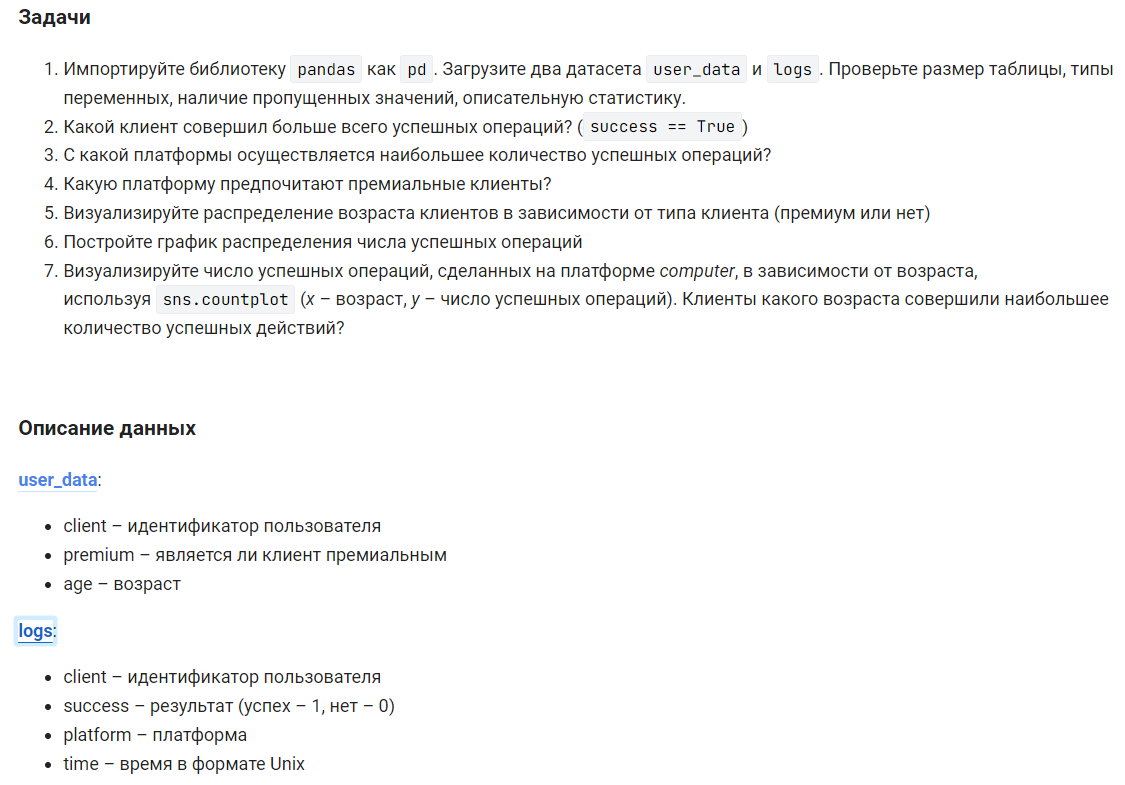

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [10]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [11]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


Oh well, here're more rows in the second table... Let's find some info about the users platforms 

In [52]:
platforms_score = logs['platform'].value_counts('platform', True).mul(100).reset_index().round(2) \
                .rename(columns={'index': 'platform', 'platform': 'percentage'})
platforms_score

,platform,percentage
0,phone,61.18
1,computer,33.44
2,tablet,5.38


Now we're gonna find users, who did most of all successful operations

In [30]:
successful_users = logs.query('success == True').groupby('client', as_index=False).count().sort_values('success', ascending=False)
successful_users

,client,success,platform,time
332,12179,41,41,41
1758,61468,41,41,41
1487,52870,41,41,41
1759,61473,41,41,41
2626,92584,41,41,41
...,...,...,...,...
956,34121,1,1,1
957,34191,1,1,1
958,34198,1,1,1
959,34277,1,1,1


And output them all...

In [45]:
data = successful_users[['client', 'success']].query('success == 41').reset_index(drop=True)
data

,client,success
0,12179,41
1,61468,41
2,52870,41
3,61473,41
4,92584,41
5,82563,41
6,78349,41
7,36165,41
8,28719,41


In [50]:
print(*sorted([data['client'][i] for i in data['client'].keys()]), sep=', ')
# A bit hard to read, but I don't like to write more lines for a simple task (here are ids of the clients above in ascending order)

12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584


What about finding the most popular platform among premium clients?

In [70]:
user_full_info = user_data.merge(logs, on='client')
user_full_info

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [71]:
premium_users = user_full_info.query('premium == True')
premium_users['platform'].value_counts('platform', True).mul(100).round(2).reset_index()

,index,platform
0,phone,58.57
1,computer,35.71
2,tablet,5.71


Well, as we can see, phones are the most comfortable way to do operations among nearly 60% of all the users. <br>
Now we're gonna visualize, how many people of different age have premium and not

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


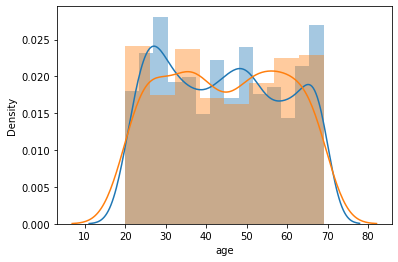

In [96]:
sns.distplot(user_full_info.query('premium == False')['age'])
sns.distplot(user_full_info.query('premium == True')['age'])
plt.show()

We need to learn a distribution of amount of successful operations

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

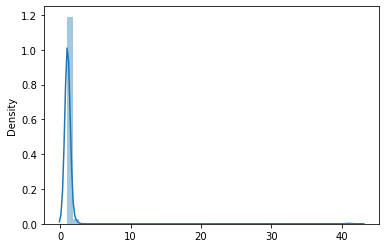

In [108]:
user_success = logs.groupby('client').agg({'success' : 'count'})
sns.distplot(user_success)

And finally, let's find a distribution of users'ages, who did successful operations with computer, and show the amount of the operations

<AxesSubplot:xlabel='age', ylabel='count'>

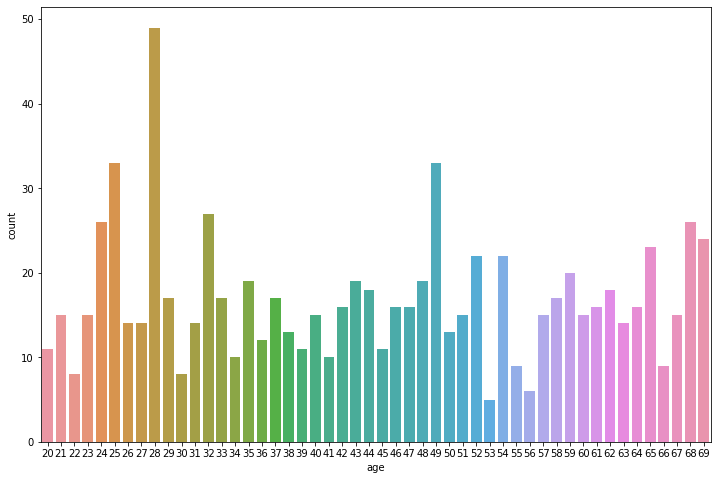

In [124]:
computer_success = user_full_info.query("platform == 'computer' and success == True")

plt.figure(figsize=(12, 8))
sns.countplot(data=computer_success, x=computer_success.age)